In [103]:
import os
import json 
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
print(os.chdir("/mnt/scratch/smsarwar/better"))
def convert_result_string(result_string, method, query_type):
    result_string_splitted = result_string.strip().split("\t")
    result = []
    result.append(int(result_string_splitted[0]))
    result.append(float(result_string_splitted[1]))
    result.append(float(result_string_splitted[2]))
    result.append(float(result_string_splitted[3]))
    result.append(float(result_string_splitted[4]))
    result.append(method)
    result.append(query_type)
    return result
    

config = json.load(open("code/config/unsupervised_lm_config.json"))
data_directory = config["data"]
src_lang = "chinese"
trg_lang = "english"
representations = ["", "", "bert"]
approaches = ["ql", "prf", "unsupervised_lm"]
query_types = ["sentences", "triggers"]
df_array = []
    
for tuple in zip(approaches, representations):
    print(tuple)
    approach = tuple[0]
    representation = tuple[1]
    for query_type in query_types:
        result_file = None
        if os.path.exists(os.path.join(data_directory, trg_lang, "results", "data", src_lang, approach, representation, query_type, "output.res")):
            result_file = open(os.path.join(data_directory, trg_lang, "results", "data", src_lang, approach, representation, query_type, "output.res"))
            result_strings = result_file.readlines()
            data = []
            for result_string in result_strings:
                if representation!="":
                    result = convert_result_string(result_string, approach.upper() + "_" + representation.upper(), query_type)
                else:
                    result = convert_result_string(result_string, approach.upper(), query_type)
                data.append(result)
                #print(result)
            df = pd.DataFrame(data, columns = ["#Examples", "P@5", "P@10", "P@20", "mAP", "Method", "Query Type"])
            df_array.append(df)
        else:
            print(os.path.join(data_directory, trg_lang, "results", "data", src_lang, approach, representation, query_type, "output.res"))
        
all_df = pd.concat(df_array)
# print(set(df["Query Type"].tolist()))
# test_df = all_df.loc[all_df["Query Type"] == "triggers"]
# print(test_df.loc[test_df["Query Type"] == "triggers"])



None
('ql', '')
('prf', '')
('unsupervised_lm', 'bert')
small_data/ace/english/results/data/chinese/unsupervised_lm/bert/triggers/output.res


In [104]:
metric = "P@5"
#sns_plot = sns.relplot(x="#examples", y=metric, col="query_type", row="method", height=4, kind="line", estimator=None, data=all_df)
#sns_plot.savefig(os.path.join(data_directory, trg_lang, "results", "figures", src_lang + "_" + metric + "_result.pdf"))

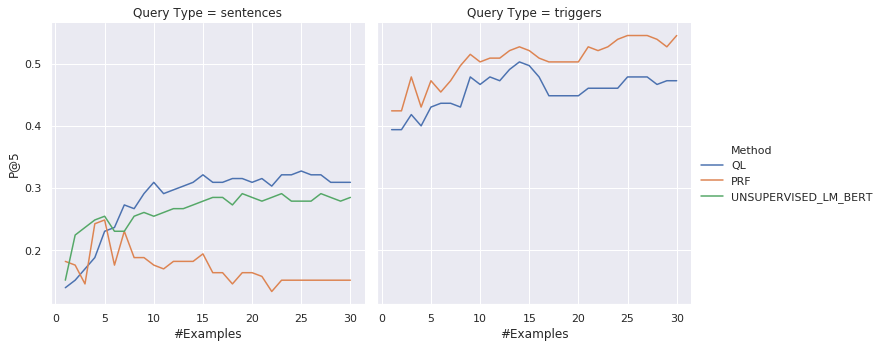

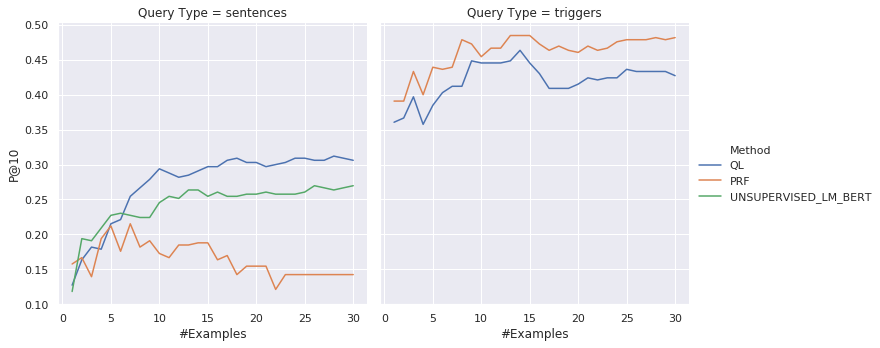

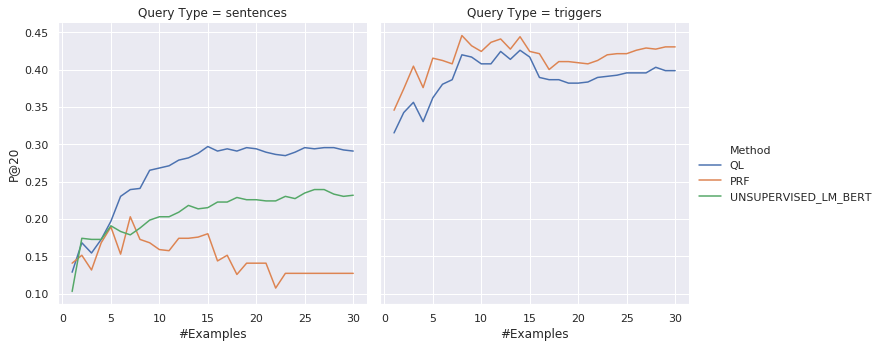

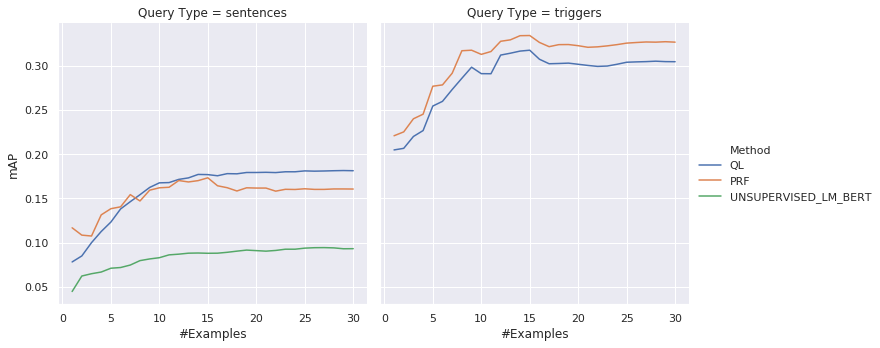

In [106]:
#sns.relplot(x="#Examples", y=metric, height=5, hue="Method", kind="line", data=all_df.loc[all_df["Query Type"]=="triggers"])
for metric in ["P@5", "P@10", "P@20", "mAP"]:
    sns.relplot(x="#Examples", y=metric, col= "Query Type", height=5, hue="Method", kind="line", data=all_df)
    sns_plot.savefig(os.path.join(data_directory, trg_lang, "results", "figures", src_lang + "_" + metric + "_result.pdf"))

In [107]:
#sns.relplot(x="#Examples", y=metric, height=5, hue=["Method", "Query Type"], kind="line", data=all_df.loc[all_df["Query Type"]=="sentences"])